# Student performance analysis

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
porData = pd.read_csv("datasets/student-por.csv")
matData = pd.read_csv("datasets/student-mat.csv")
studentData = pd.concat([porData, matData], axis = 0).reset_index(drop = True)
print(studentData.shape)
display(studentData.head())

(1044, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Description of the dataset, as available on Kaggle, is as follows.

> **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
> **sex** - student's sex (binary: 'F' - female or 'M' - male)  
> **age** - student's age (numeric: from 15 to 22)  
> **address** - student's home address type (binary: 'U' - urban or 'R' - rural)  
> **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
> **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
> **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  
> **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  
> **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
> **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
> **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
> **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')  
> **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
> **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
> **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)  
> **schoolsup** - extra educational support (binary: yes or no)  
> **famsup** - family educational support (binary: yes or no)  
> **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
> **activities** - extra-curricular activities (binary: yes or no)  
> **nursery** - attended nursery school (binary: yes or no)  
> **higher** - wants to take higher education (binary: yes or no)  
> **internet** - Internet access at home (binary: yes or no)  
> **romantic** - with a romantic relationship (binary: yes or no)  
> **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
> **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)  
> **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)  
> **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
> **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
> **health** - current health status (numeric: from 1 - very bad to 5 - very good)  
> **absences** - number of school absences (numeric: from 0 to 93)  
> **G1** - first period grade (numeric: from 0 to 20)  
> **G2** - second period grade (numeric: from 0 to 20)  
> **G3** - final grade (numeric: from 0 to 20, output target)  

In [3]:
studentData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Pearson's Correlation


<AxesSubplot:>

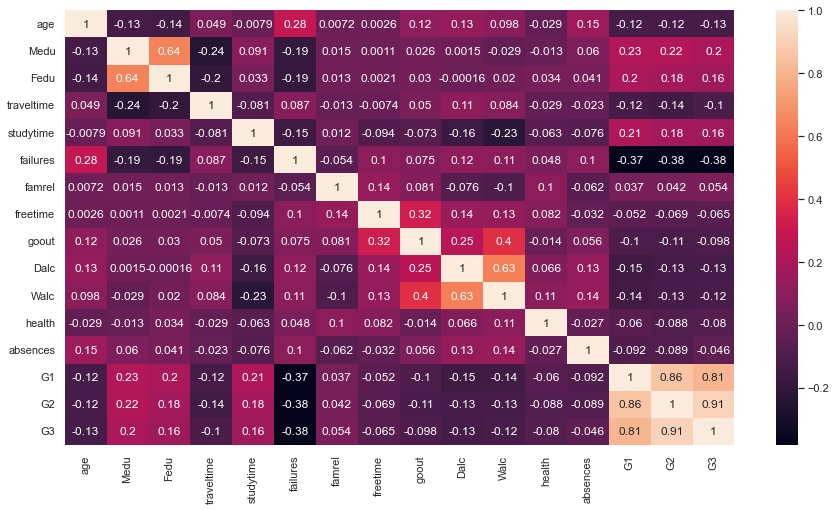

In [4]:
print("Pearson's Correlation")
plt.figure(figsize=(15,8))
sns.heatmap(studentData.select_dtypes(include=np.number).corr(),annot=True)

# Data visualisation

Splitting into different types of features

In [5]:
cat_features = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian",
               "schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
num_features = ["Medu","Fedu","traveltime","studytime","famrel","freetime","goout","Dalc","Walc","health"]
cont_features = ["age","failures","absences","G1","G2","G3"]

In [6]:
def get_num_rows(features, numCols=5):
    numFeatures = len(features)
    numRows = math.ceil(numFeatures/numCols)
    deletedAxes = numRows*numCols - numFeatures
    return numRows, deletedAxes

In [7]:
def bar_matrix(df, features, numCols=5, annot=True, title=""):
    numRows, deletedAxes = get_num_rows(features)
    fig, axes = plt.subplots(numRows, numCols, figsize=(numCols*4, numRows*3), constrained_layout=True)
    plt.suptitle(f'{title}', size=20, fontweight="bold", fontfamily="serif")
    axes=axes.ravel()
    if deletedAxes > 0:
        for ax in range(1, deletedAxes+1):
            axes[-ax].remove()
    for i in range(len(features)):
        #creating plotting data information
        ax = axes[i]
        feature = features[i]
        #creating plot
        sns.countplot(x=feature,data=df,palette=sns.color_palette("coolwarm"),ax=ax)
        #adjusting plot
        ax.set_xlabel("")
        ax.set_title(feature)
        ax.set_ylim(0, max(ax.get_ylim()) + max(ax.get_ylim())/8)
        #writing percentage over each bar
        if annot==True:
            for p in ax.patches:
                x = p.get_x() + 0.2
                y = p.get_height() + 1
                percentage = '{:.1f}%'.format(100*p.get_height()/df.shape[0])
                ax.annotate(percentage,(x,y))

In [8]:
def hist_violin(df, features, title=""):
    numFeatures = len(features)
    fig, axes = plt.subplots(numFeatures, 2, figsize=(12,numFeatures*2), constrained_layout=True)
    fig.suptitle(f"{title}", size=20, fontweight="bold", fontfamily="serif")
    for i in range(len(features)):
        ax = axes[i][0]
        feature = features[i]
        sns.histplot(x=feature,data=df,palette=sns.color_palette("coolwarm"),ax=ax,kde=True)
        ax.set_title(feature)
        ax = axes[i][1]
        sns.violinplot(x=feature,data=df,palette=sns.color_palette("coolwarm"),ax=ax)

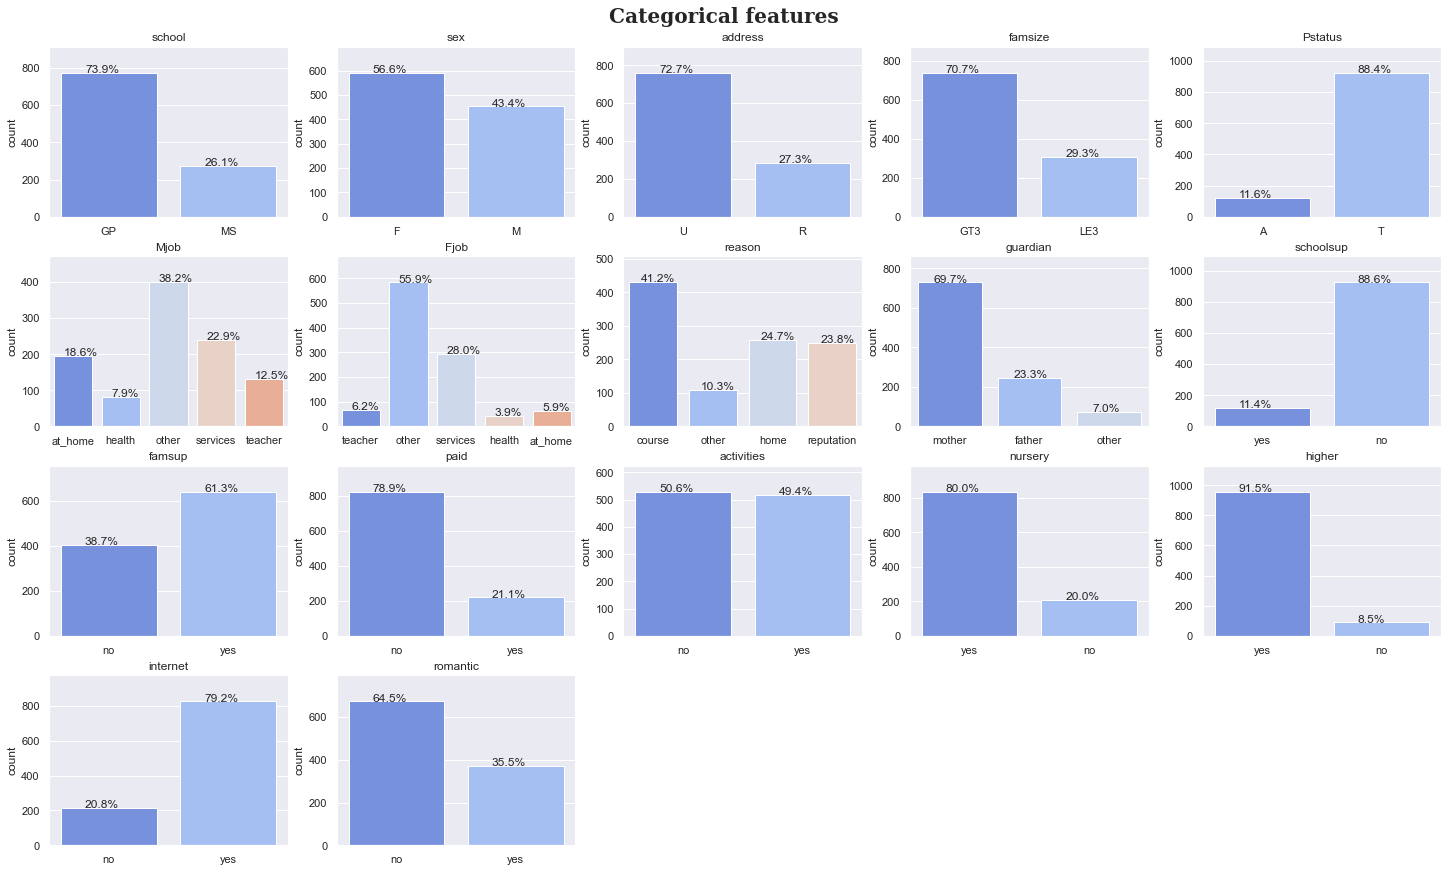

In [9]:
bar_matrix(studentData, cat_features, annot=True, title='Categorical features')

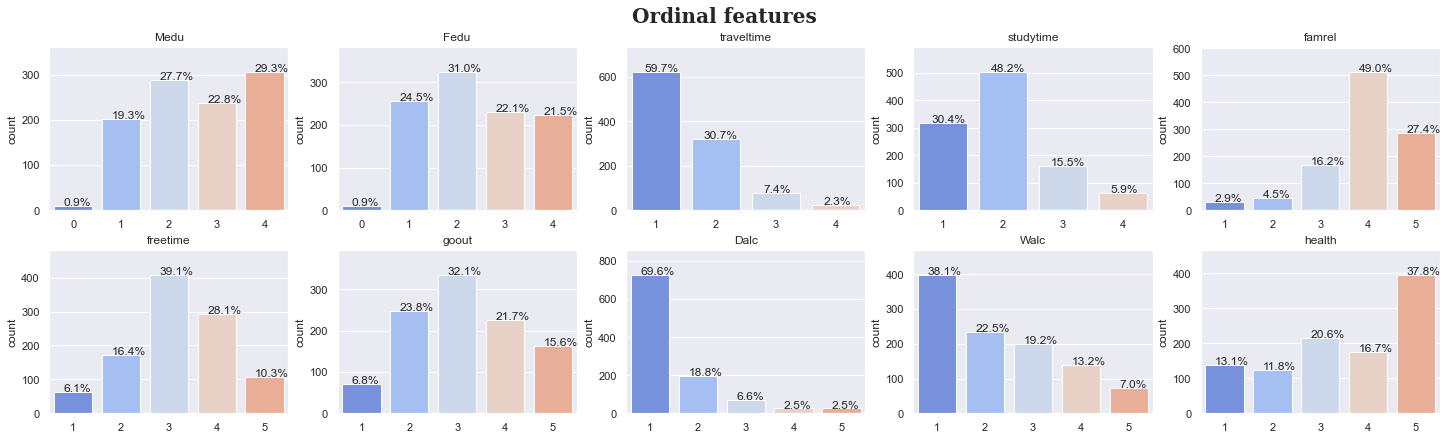

In [10]:
bar_matrix(studentData, num_features, annot=True, title='Ordinal features')

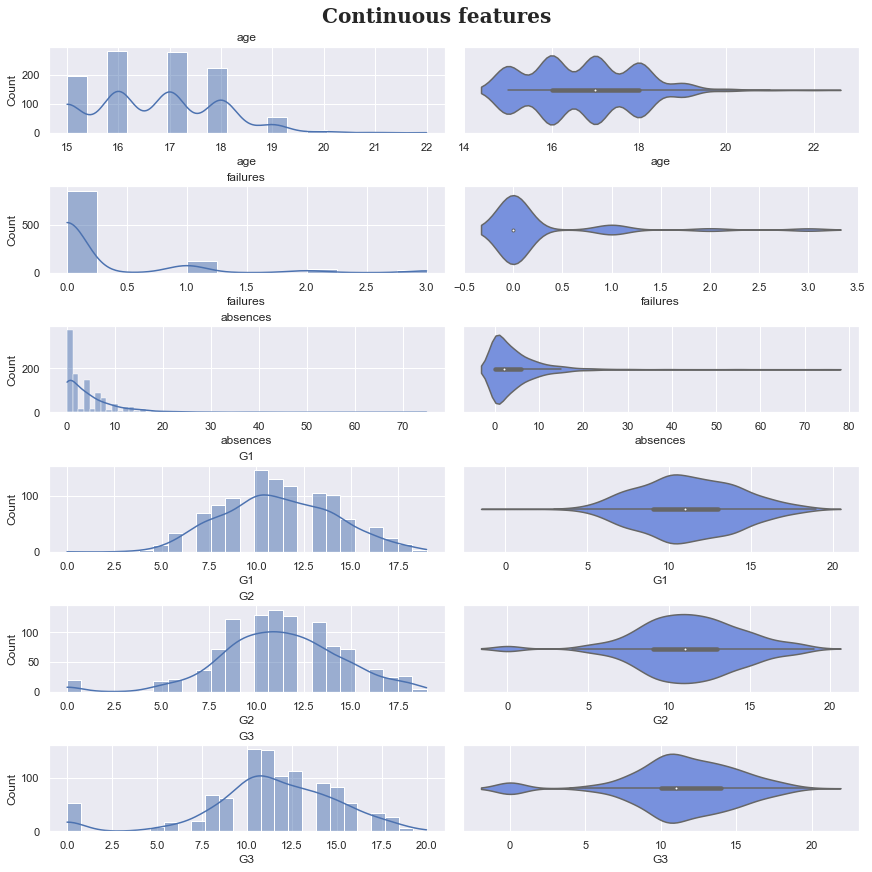

In [11]:
hist_violin(studentData, cont_features, title='Continuous features')

## Investigation 1: Number of failures

failures has highest negative correlation with G3 score.  
It is understandable as higher number of failures would indicate lack of understanding of material, hence not doing so well in final G3 exams.  
failures: number of past class failures (numeric: n if 1<=n<3, else 4) 

In [12]:
studentData["failures"].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

Most students have 0 failures, which likely means students must be substantially weak in the subject in order to fail, further emphasising the likelihood of negative correlation between test score and number of failures.  
Also, it appears no student has 4 and above failures.

In [13]:
def hist_for_feature(df, feature, title=""):
    uniqueVals = sorted(df[feature].unique())
    numRows = len(uniqueVals)
    fig, axes = plt.subplots(numRows, 1, figsize=(20, 20))
    fig.suptitle(f"{title}", size=20, fontweight="bold", fontfamily="serif")
    for i in range(len(uniqueVals)):
        df2 = pd.DataFrame(columns = ["G3"])
        for j in range(len(df[feature])):
            if (df.iloc[j][feature] == uniqueVals[i]):
                df3 = pd.DataFrame([{"G3": df.iloc[j]["G3"]}])
                df2 = pd.concat([df2, df3], ignore_index = True)
        ax = axes[i]
        ax.set_title(f"{feature}: {uniqueVals[i]}")
        sns.histplot(x="G3",data=df2,palette=sns.color_palette("coolwarm"),ax=ax,kde=True)
        print(f"\n{feature} {uniqueVals[i]}")
        print(df2.astype(int).describe())


failures 0
               G3
count  861.000000
mean    12.054588
std      3.428071
min      0.000000
25%     10.000000
50%     12.000000
75%     14.000000
max     20.000000

failures 1
               G3
count  120.000000
mean     8.425000
std      4.009783
min      0.000000
25%      8.000000
50%     10.000000
75%     11.000000
max     18.000000

failures 2
              G3
count  33.000000
mean    7.484848
std     4.272888
min     0.000000
25%     6.000000
50%     8.000000
75%    10.000000
max    15.000000

failures 3
              G3
count  30.000000
mean    6.800000
std     3.745342
min     0.000000
25%     5.500000
50%     8.000000
75%    10.000000
max    11.000000


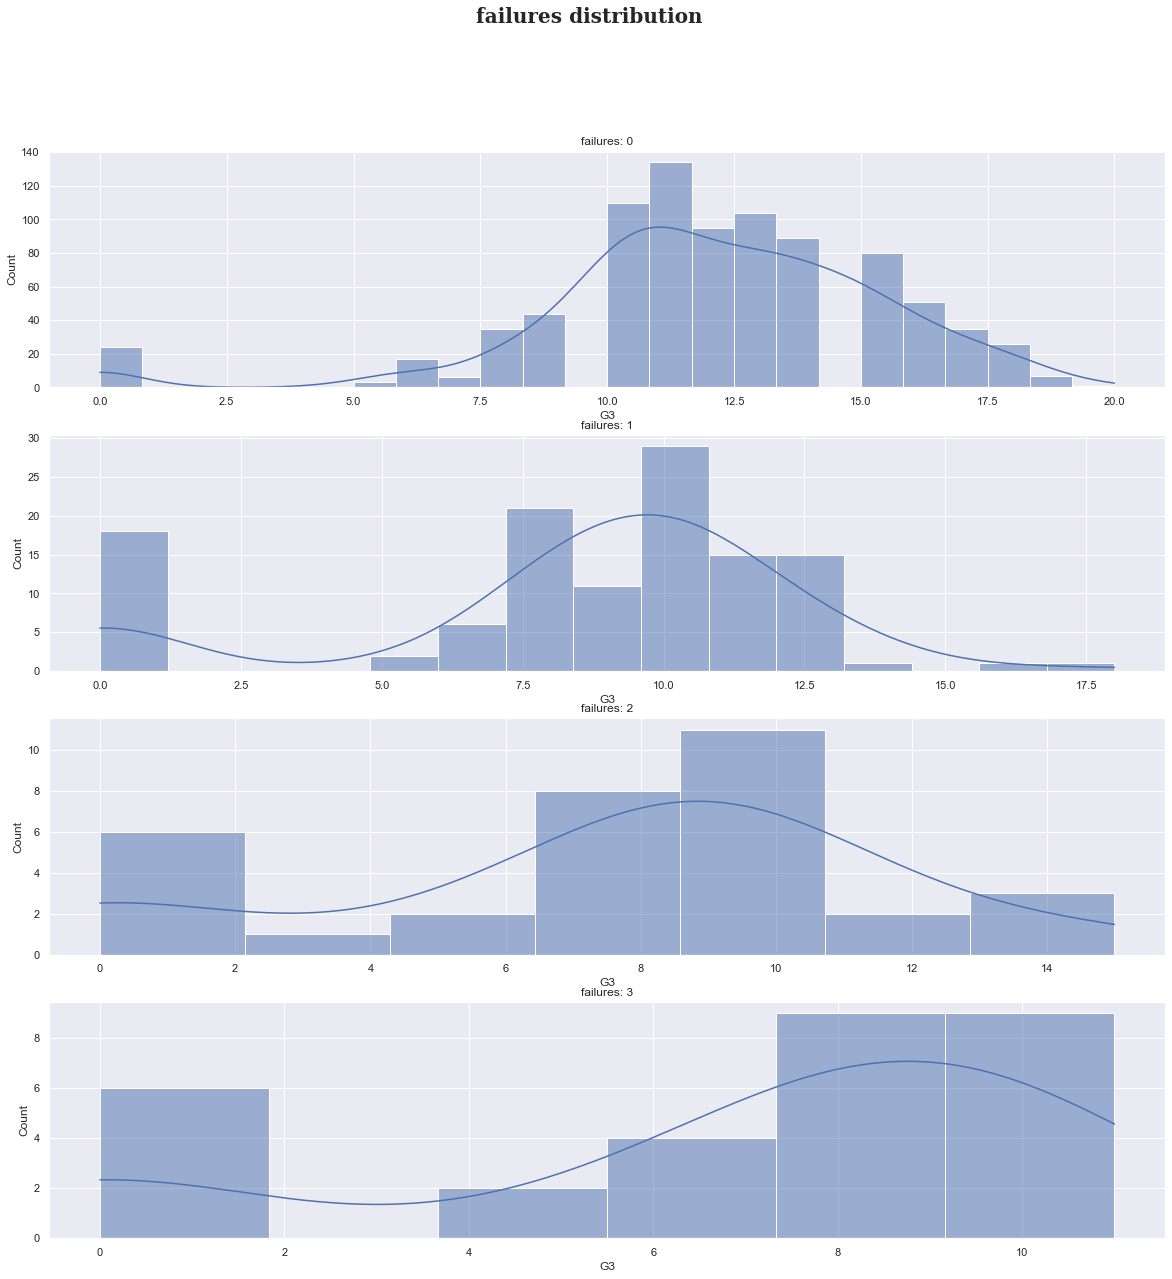

In [14]:
hist_for_feature(studentData, "failures", title="failures distribution")

From the charts, it is clear that number of failures indicate a weak foundation and hence lower grades for final G3 examinations.  
However, are the number of failures affected by circumstances not up to the students' control?

### Number of failures and age

In [15]:
studentData["age"].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='failures'>

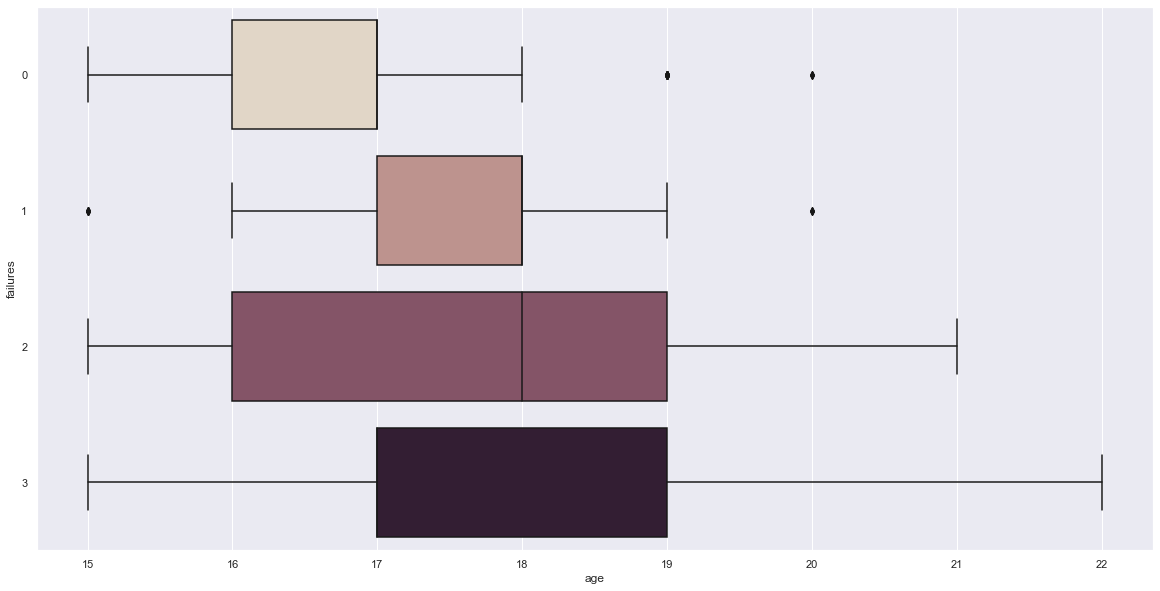

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(x = "age", y = "failures", orient = "h", palette = "ch:.25", data = studentData)

As students enter higher years of education, the examinations get more difficult, which might contribute to more variations in grades.  
This is reflected in the increasing interquartile ranges.  
Exams also contain more material, so preparedness is important, else students might fail, so failure rate generally increases too.

### Number of failures and parents education

This case is interesting.  
Parents education actually has a negative correlation with failure rate, which means the more educated a student's parents are, the less times he fails.  
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 

In [17]:
print(studentData["Medu"].value_counts())
print(studentData["Fedu"].value_counts())

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64
2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64


<AxesSubplot:xlabel='Fjob', ylabel='failures'>

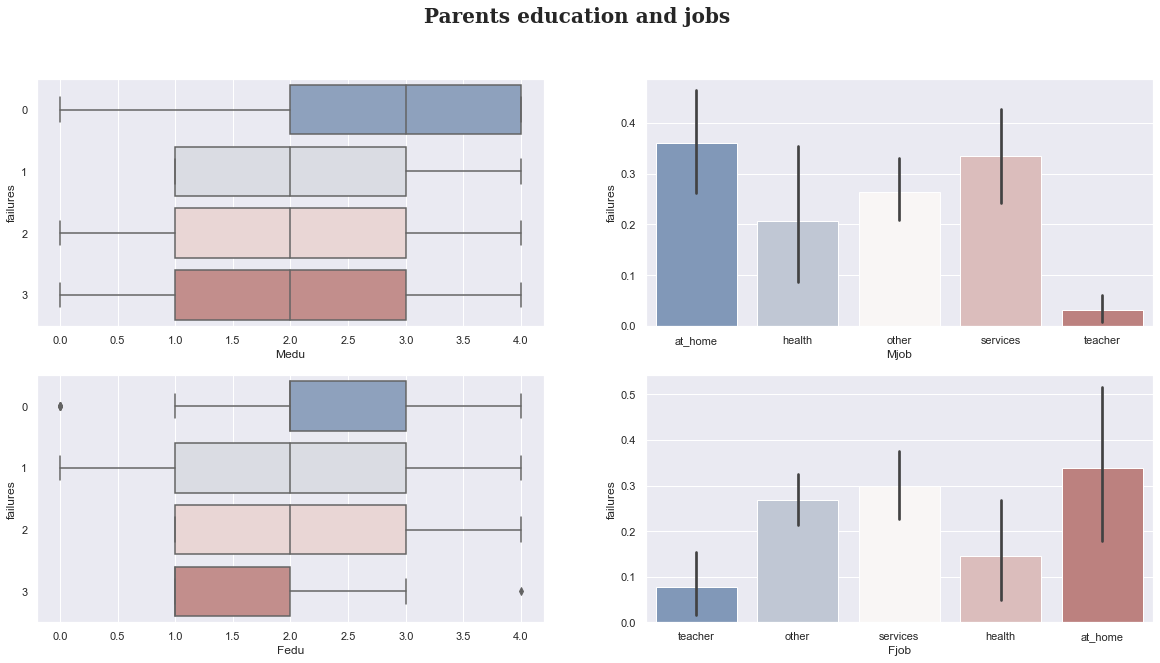

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Parents education and jobs", size=20, fontweight="bold", fontfamily="serif")
sns.boxplot(x = "Medu", y = "failures", ax=axes[0][0], orient="h", palette = "vlag", data = studentData)
sns.barplot(x = "Mjob", y = "failures", ax=axes[0][1], palette = "vlag", data = studentData)
sns.boxplot(x = "Fedu", y = "failures", ax=axes[1][0], palette = "vlag", orient="h", data = studentData)
sns.barplot(x = "Fjob", y = "failures", ax=axes[1][1], palette = "vlag", data = studentData)

It appears less educated parents have children who are more likely to fail.  
More interestingly, parents who stay at home have childrens also more likely to fail, and parents who work as teachers and in health sectors have children who fail much less.

### Parents education and its effects

In [19]:
studentData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
features = ["famsize", "reason", "traveltime", "studytime", "schoolsup", "famsup", "paid",
            "activities", "nursery", "higher", "internet", "romantic", "Dalc", "Walc"]
higherEdParents = studentData.loc[(studentData["Medu"] == 4) & (studentData["Fedu"] == 4)]
lowerEdParents = studentData.loc[(studentData["Medu"] != 4) & (studentData["Fedu"] != 4)]

Dividing parents to 2 groups, one is where both parents have not had further education beyond secondary school, so classified as "lowerEdParents".  
Parents where both have had further education beyond secondary school will be considered "higherEdParents".

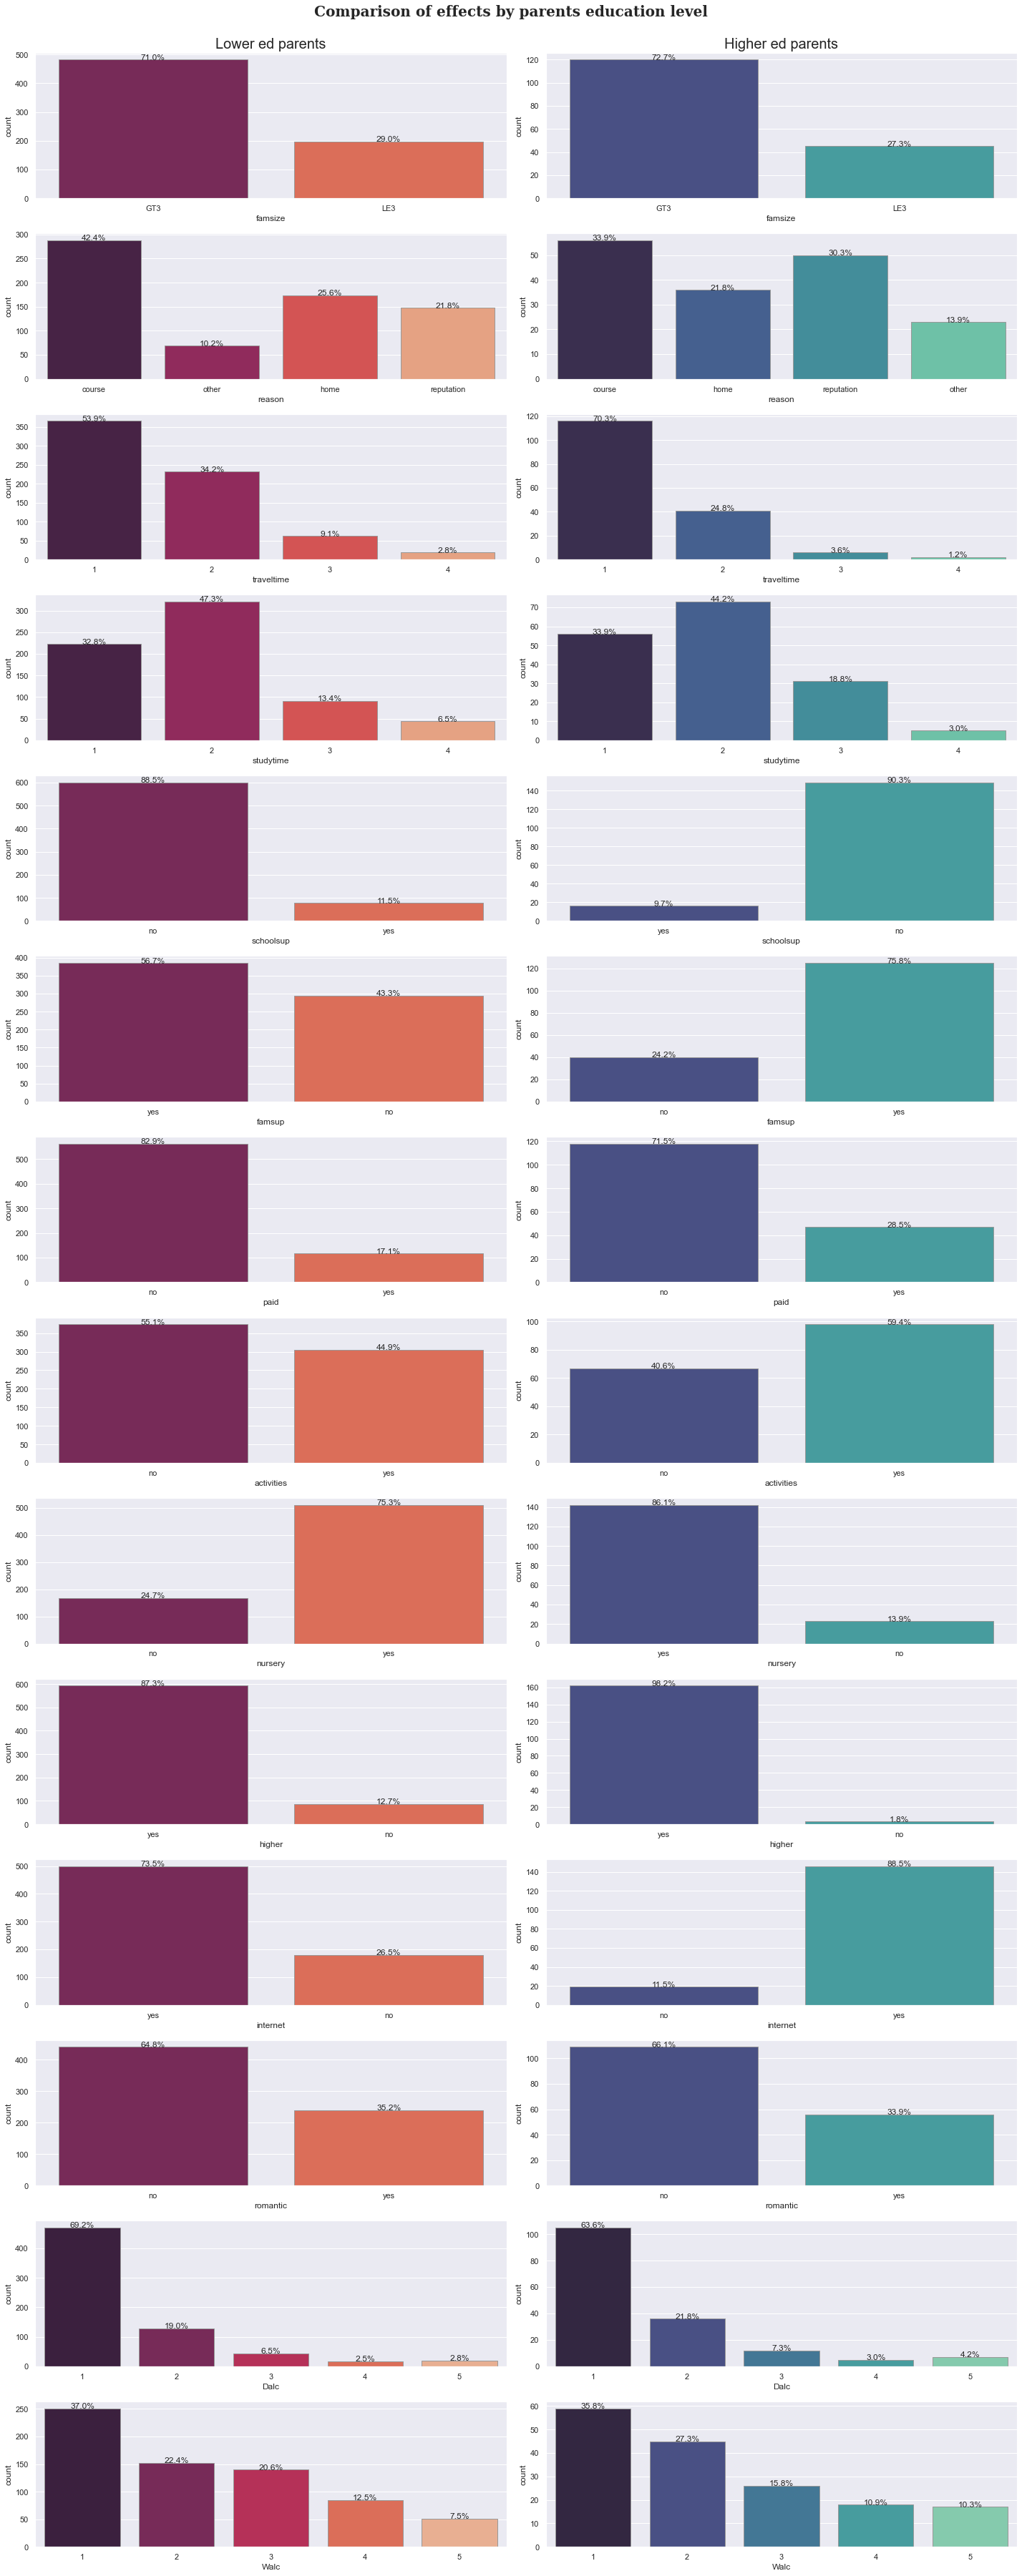

In [21]:
fig, axes = plt.subplots(len(features), 2, figsize=(20, 50))
fig.suptitle("Comparison of effects by parents education level", size=20, fontweight="bold", fontfamily="serif", y=1)
i = 0
axes[i][0].set_title("Lower ed parents", fontsize = 20)
axes[i][1].set_title("Higher ed parents", fontsize = 20)
edParents = [lowerEdParents, higherEdParents]
for feature in features:
    currentAxes = [axes[i][0], axes[i][1]]
    sns.countplot(x=feature, palette="rocket", edgecolor=".6", data=edParents[0], ax=currentAxes[0])
    sns.countplot(x=feature, palette="mako", edgecolor=".6", data=edParents[1], ax=currentAxes[1])
    for j in range(len(currentAxes)):
        for p in currentAxes[j].patches:
            percentage = '{:.1f}%'.format(100*p.get_height()/(edParents[j].shape[0]))
            x = p.get_x() + p.get_width()/2
            y = p.get_height()
            currentAxes[j].annotate(percentage,(x,y), ha="center")
    i += 1
plt.tight_layout()

<ul>
<li>
From the charts, it can be seen that students with parents of higher education are more able to choose schools based on reputation. This might be because they have generally done better in school and have more options available.</li>
<li>
It can also be seen that higherEdParents students have shorter traveltime to schools, probably because their parents are better able to afford homes which have closer access to such amenities.
</li>
<li>
lowerEdParents students are also much more likely to seek family education support services. A possibility might be because their homes are not the most conducive to study in.
</li>
<li>
HigherEdParents students are more likely to have extra paid classes, more likely to have joined nursery when they were younger, seek higher education in the future and have access to the internet. These factors certainly improve the development of these students and expose them to opportunities not open to those with lowerEdParents.
</li>
<li>
There is not much difference between the two student groups for fields such as having a romantic partner and time spent on drinking.
</li>

## Investigation 2: Studytime with grades

studytime has highest positive correlation with G3 score, excluding G1 and G2, so let's investigate it too.  
studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


studytime 1
               G3
count  317.000000
mean    10.580442
std      3.891405
min      0.000000
25%      9.000000
50%     11.000000
75%     13.000000
max     19.000000

studytime 2
               G3
count  503.000000
mean    11.335984
std      3.772468
min      0.000000
25%     10.000000
50%     11.000000
75%     14.000000
max     19.000000

studytime 3
               G3
count  162.000000
mean    12.493827
std      3.618872
min      0.000000
25%     11.000000
50%     13.000000
75%     15.000000
max     19.000000

studytime 4
              G3
count  62.000000
mean   12.274194
std     4.223934
min     0.000000
25%    10.000000
50%    12.000000
75%    15.000000
max    20.000000


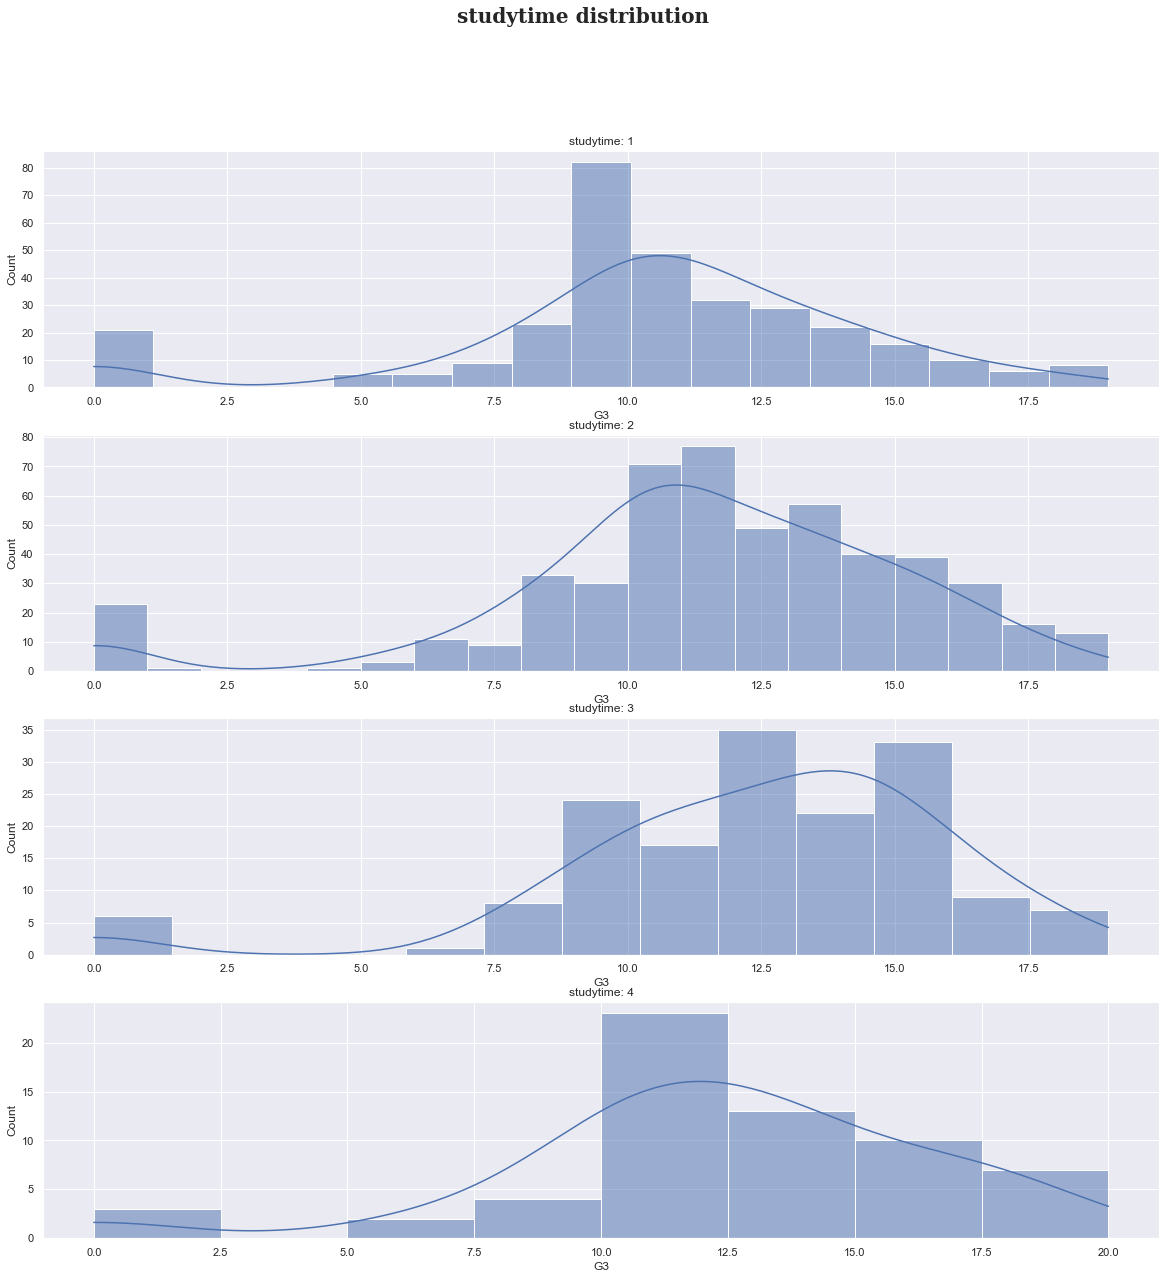

In [22]:
hist_for_feature(studentData, "studytime", title="studytime distribution")

As seen from the chart, higher studytime is generally correlated to higher scores.  
Although the mean score for those who study > 10h each week is slightly lower than those who study for 5-10h, it is likely due to shortage of information as not many of them study for that long. Furthermore, the standard deviation is larger, indicating there are those who also do very well, as indicated in the chart.

From the correlation chart, lower studytime is negatively correlated to the time spent consuming alcohol.

### studytime and alchohol consumption

In [23]:
features = ["Dalc", "Walc"]
drinkers = studentData.loc[(studentData["Dalc"] > 2) | (studentData["Walc"] > 2)]
nonDrinkers = studentData.drop(drinkers.index, axis = 0)

Splitting studentData into 2 groups:  
<ul>
<li>
Drinkers - those who consume more than "Low" level during work days or weekends
</li>
<li>
Non-drinkers - studentData less drinkers
</li>

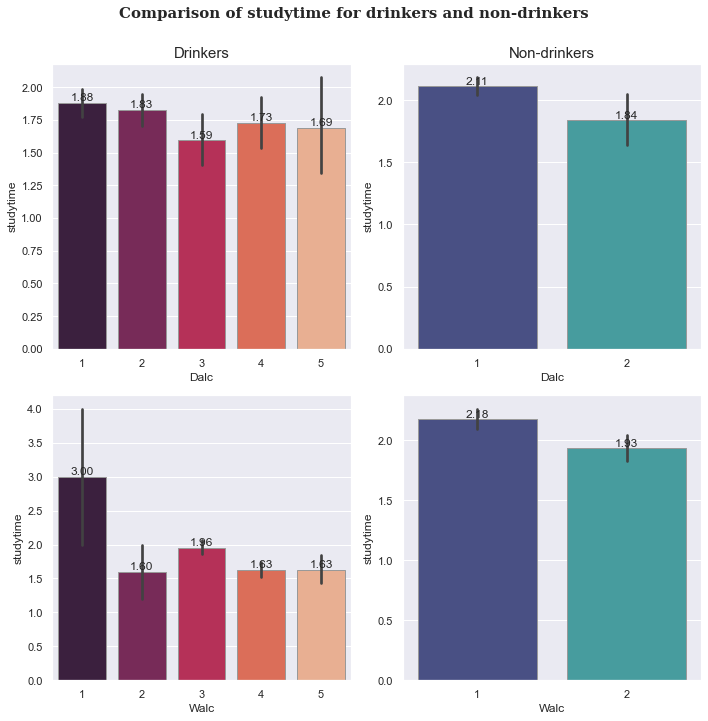

In [24]:
fig, axes = plt.subplots(len(features), 2, figsize=(10, 10))
fig.suptitle("Comparison of studytime for drinkers and non-drinkers", size=15, fontweight="bold",
             fontfamily="serif", y=1)
i = 0
axes[i][0].set_title("Drinkers", fontsize = 15)
axes[i][1].set_title("Non-drinkers", fontsize = 15)
drinkerTypes = [drinkers, nonDrinkers]
for feature in features:
    currentAxes = [axes[i][0], axes[i][1]]
    ax = sns.barplot(y="studytime", x=feature, palette="rocket", edgecolor=".6",
                     data=drinkerTypes[0], ax=currentAxes[0])
    ax.bar_label(ax.containers[0], fmt='%.2f')
    ax = sns.barplot(y="studytime", x=feature, palette="mako", edgecolor=".6", data=drinkerTypes[1], ax=currentAxes[1])
    ax.bar_label(ax.containers[0], fmt='%.2f')
    i += 1
plt.tight_layout()

In general, it can be seen that non-drinker usually have more studytime than drinkers.  
However, for those who drink during the working days but not weekends, they have very high studytime during weekends. Probably cramming all their work during weekends.

### Alcohol consumption and absences

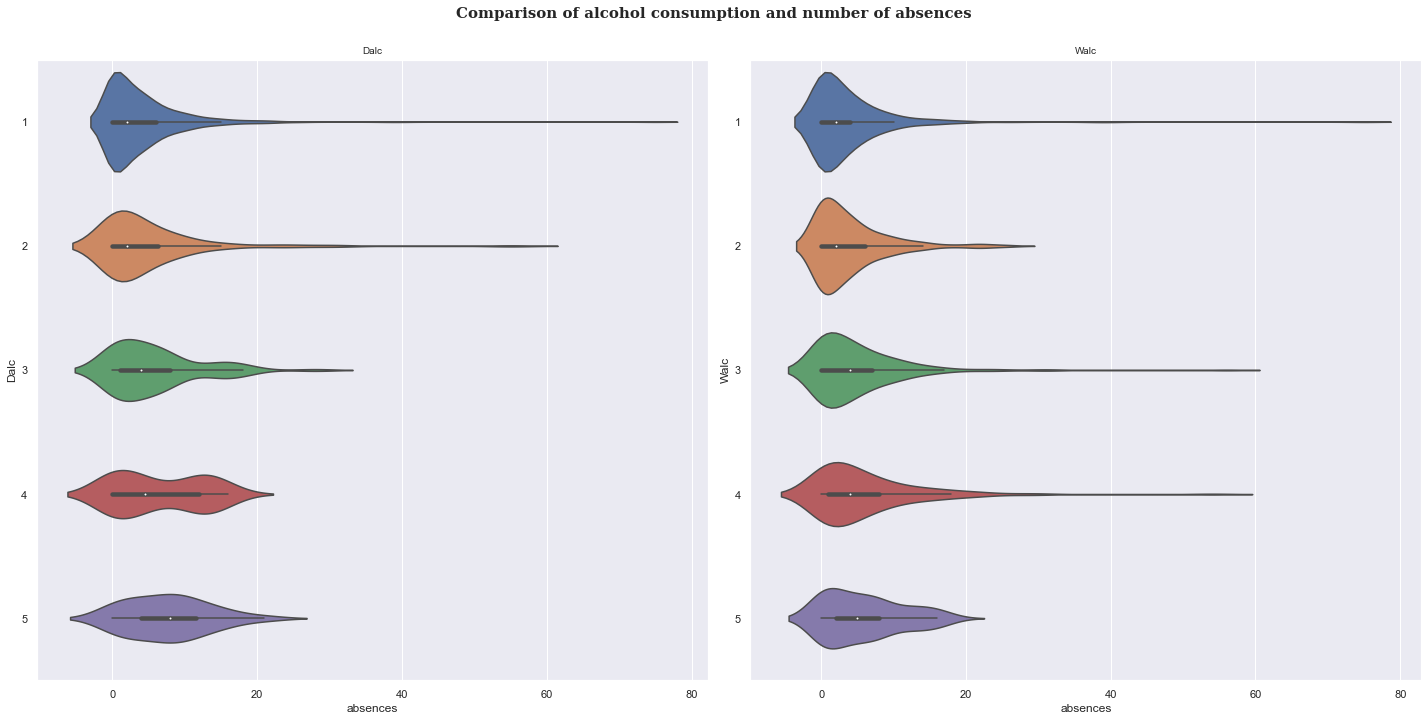

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Comparison of alcohol consumption and number of absences", size=15, fontweight="bold",
             fontfamily="serif", y=1)
for i in range(len(features)):
    axes[i].set_title(features[i], fontsize = 10)
    sns.violinplot(x="absences", y=features[i], orient="h", ax=axes[i], data=studentData)
plt.tight_layout()

In general, absences increase when alcohol consumption frequency increases.  
The missing of classes and less studytime will surely contribute to poor grades and increased failure rates.